C:\Users\Asus\AppData\Local\Temp\ipykernel_17104\435205719.py:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'epochs': 200, 'learning_rate': 0.001}
Best score: 0.9695619940757751
15/15 [==============================] - 0s 1ms/step
X_train shape: (1347, 64)
X_test shape: (450, 64)
y_train shape: (1347, 10)
y_test shape: (450, 10)
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       0.95      1.00      0.97        38
           3       0.98      0.96      0.97        46
           4       1.00      1.00      1.00        55
           5       0.95      0.97      0.96        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.97      0.97      0.97        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98    

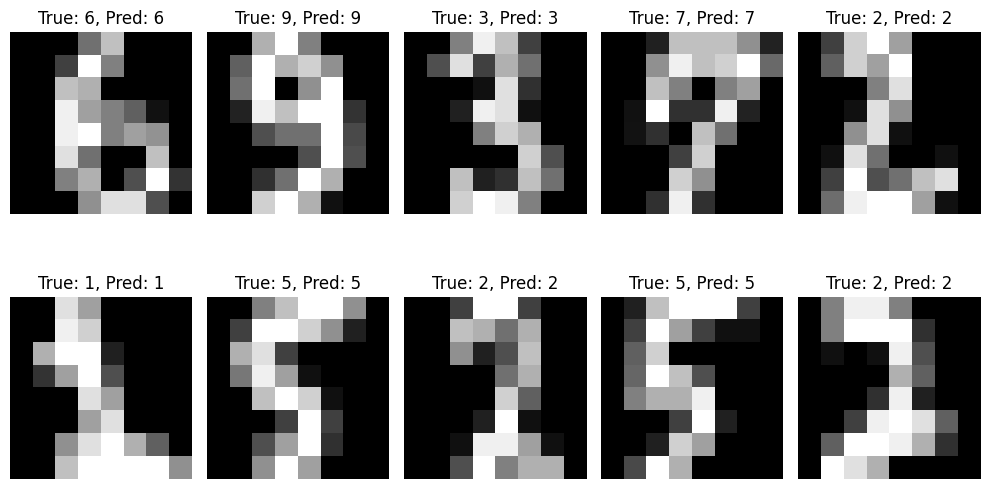

In [3]:
from IPython.display import Image
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 

%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical

# Load dataset
digits = load_digits()
data = digits.images
target = digits.target

# Reshape input data
data = data.reshape((1797, 64))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

# Scale input data
min_max_sc = MinMaxScaler()
X_train = min_max_sc.fit_transform(X_train)
X_test = min_max_sc.transform(X_test)

# Encode target variable as categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
def create_model(learning_rate=0.001, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(64,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create KerasClassifier for GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.1, 0.2]
}

# Create GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the GridSearchCV object to the data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best score: {grid_result.best_score_}")

# Use the best model to make predictions on test set
best_model = grid_result.best_estimator_.model
pred = best_model.predict(X_test)

# Decode target variable
y_test_decoded = np.argmax(y_test, axis=1)
pred_decoded = np.argmax(pred, axis=1)

# Print results
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

#Print classification report and accuracy score
print("Classification report:")
print(classification_report(y_test_decoded, pred_decoded))

print("Confusion matrix:")
print(confusion_matrix(y_test_decoded, pred_decoded))

print(f"Accuracy score: {accuracy_score(y_test_decoded, pred_decoded)}")

#Plot a random sample of 10 images from the test set with their predicted and true labels
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
axs = axs.flatten()

for i in range(10):
    img = X_test[i].reshape(8, 8)
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f"True: {y_test_decoded[i]}, Pred: {pred_decoded[i]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

